## Clairvoyant - Emotion Recognition with Deep Learning
Sir there is no certifation for this course that I can upload in the gcr, hence I am attaching this python notebook with everything I learnt and did in the course.
Course link: https://www.clairvoyant.ai/blog/emotion-recognition-with-deep-learning-on-google-colab

In [3]:
from zipfile import ZipFile
file_name="archive.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print("Done")

Done


#### Import packages

In [2]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Initializing Training and Test Generators


In [3]:
train_img_datagen=ImageDataGenerator(rescale=1./255)
val_img_datagen=ImageDataGenerator(rescale=1./255)

train_set=train_img_datagen.flow_from_directory(
    'train',
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical')

val_set=val_img_datagen.flow_from_directory(
    'test',
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#### Building the CNN model

In [4]:
import tensorflow as tf
base_model=tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights='imagenet')

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

C:\Users\mahes\Rvu-Python\emotion\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compiling and Training

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_info = model.fit(
        train_set,
        steps_per_epoch=449,
        epochs=50,
        validation_data=val_set,
        validation_steps=112)

Epoch 1/50


C:\Users\mahes\Rvu-Python\emotion\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.2658 - loss: 1.7879 - val_accuracy: 0.4252 - val_loss: 1.4805
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 100us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.3649
Epoch 3/50


C:\Users\mahes\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


449/449 ━━━━━━━━━━━━━━━━━━━━ 36s 81ms/step - accuracy: 0.4366 - loss: 1.4564 - val_accuracy: 0.5024 - val_loss: 1.2944
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7000 - val_loss: 1.0571
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.5000 - loss: 1.2948 - val_accuracy: 0.5414 - val_loss: 1.2028
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 2.0258
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 35s 77ms/step - accuracy: 0.5438 - loss: 1.2026 - val_accuracy: 0.5622 - val_loss: 1.1472
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.9513
Epoch 9/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 35s 77ms/step - accuracy: 0.5678 - loss: 1.1396 - val_accuracy: 0.5695 - val_loss: 1.1309
Epoch 10/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.0000e+00 - l

In [6]:
#saving the model
model.save('emotion_model.h5')

In [7]:
from keras.models import load_model
emotion_model=load_model('model.h5')

#### Graph

In [8]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()
     

#### Result


In [19]:
def facecrop(image_path):  
    facedata = 'haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)
    img = cv2.imread(image_path)
    try:
        minisize = (img.shape[1], img.shape[0])
        miniframe = cv2.resize(img, minisize)
        faces = cascade.detectMultiScale(miniframe)
        for f in faces:
            x, y, w, h = [v for v in f]
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            sub_face = img[y:y + h, x:x + w]
            cv2.imwrite('capture.jpg', sub_face)
    except Exception as e:
        print(e)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


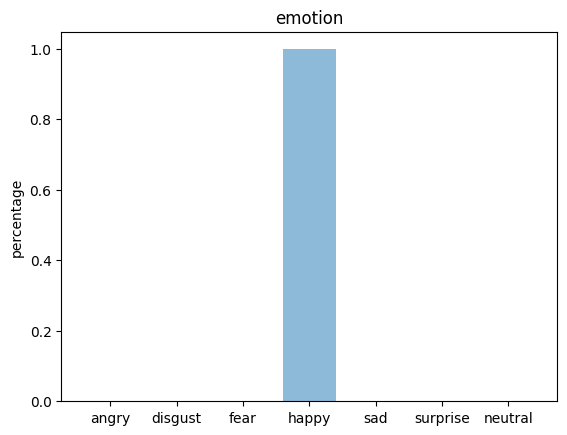

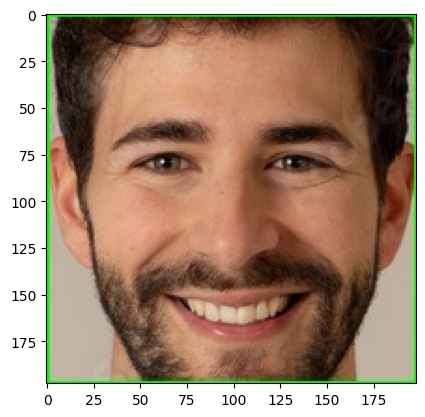

In [22]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os 

if __name__ == '__main__':
    facecrop('photo.jpg')

file = 'capture.jpg'

if os.path.exists(file):
    true_image = image.load_img(file)
    img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255

    custom = model.predict(x)
    emotion_analysis(custom[0])

    x = np.array(x, 'float32')
    x = x.reshape([48, 48])

    plt.imshow(true_image)
    plt.show()
else:
    print("File not found.")